# **Space X  Falcon 9 First Stage Landing Prediction**


###  <span style="color:#4169E1">  Machine Learning Prediction using Classification Algorithms: KNN, Decision Tree, SVM, Logistic Regression. </span>
### <span style="color:#4169E1">   Determination of the best classifier.  </span>
#### <span style="color:#4169E1">  Sikandar Shrestha, Feb 2024   <br>  Rev. Feb 7, 2024 <br> Rev. June 18th, 2022 <br> Final assignement, course "Applied Data Science Capstone". 
    
<span style="color: #7b241c"> <b>Preliminary remark: </b> The size of the test data is small: only 18 test samples. Prediction results and accuracy are very dependent on the train_test_split, if shuffling is applied: option "random-state=integer". <br> In this version of the notebook we will use atrain_test_split, 20% test set, <b>WITH shuffling.  </b> </span>  
<span style="color: #7b241c"> <b>  With default train_test_split results were a bit boring. We applied random_state=3.  </b> </span>   
<span style="color: #7b241c"> <b>  X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=3) </b> <br> We refined the hyperparameter optimization process when possible. </span>
    


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a href="https://bso/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Beautiful Soup Object</a>
            <ul>
                <li>Tag</li>
                <li>Children, Parents, and Siblings</li>
                <li>HTML Attributes</li>
                <li>Navigable String</li>
            </ul>
        </li>
    </ul>
    <ul>
        <li>
            <a href="https://filter/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Filter</a>
            <ul>
                <li>find All</li>
                <li>find </li>
                <li>HTML Attributes</li>
                <li>Navigable String</li>
            </ul>
        </li>
    </ul>
     <ul>
        <li>
            <a href="https://dscw/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Downloading And Scraping The Contents Of A Web</a>
    </li>
         </ul>
    <p>
        Estimated time needed: <strong>25 min</strong>
    </p>

</div>

<hr>


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#-------  For centering figures 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#remove pink warning box
import warnings
warnings.filterwarnings('ignore')

This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    
    ax= plt.subplot()
    #sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    sns.heatmap(cm, square=True, annot=True, annot_kws={'fontsize':16}, fmt="d", cmap='Blues', cbar=True)  # modified for cosmetic reasons. We want beauty. 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'landed']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


Load the data


In [5]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


#### TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [7]:
Y = data['Class'].to_numpy()
print(type(Y))
Y

<class 'numpy.ndarray'>


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

#### TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [8]:
# students get this 
transform = preprocessing.StandardScaler()

In [9]:
X = transform.fit_transform(X)
print(type(X))
X

<class 'numpy.ndarray'>


array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


#### TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>



<span style="color:#4169E1">  
    <b>Remarks about train_test_split: </b> "random_state" controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. Same with "Default=none".    <br>
* Given the low cardinal of vector Y_test, the selection of random_state has a strong impact on final "score". <br>
* testing several int values is like working with several shuffling data. And it is reproducible.  <br>
* with random_state=0   there is a persistent issue with fake positive on "Didn't land" with all models! <br>
* with random_state=3, some models are efficient at predicting launch attemps outcomes.   <br>
In all cases we can refine some parameters from the notebook template, and we will do it if necessary.  <br> </span>
 <span style="color:#4169E1"><b> We will work with random_state=3 </b> </span>   


In [10]:
#X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=3)
#X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=6)
#X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=3)

In [11]:
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(72, 83) (18, 83) (72,) (18,)


we can see we only have 18 test samples.


In [12]:
Y_test.shape

(18,)

#  <span style="color:#0094cf;"> 1. Logistic Regression </span>

#### TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [13]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [14]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


<span style="color:#4169E1">  <b>GridSearchCV:</b>    class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)[source]¶ <br>
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})


In [15]:
#GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
logreg_cv=GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
#logreg_cv = GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [16]:
print("Best parameter:",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Best parameter: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8339285714285714


<span style="color:#4169E1"> <b>   Refining the optimization process. </b></span>  <br>
<span style="color:#4169E1"> <b>   Let see if we can improve that result:  instead of 3 values of C, we test a refined array of parameters C between 0.005 and 0.5 with a step of 0.005. <b>  </span> 

In [17]:
vec=np.arange(0.005, 0.5, 0.005,dtype=float)
len(vec)             

99

In [18]:
#GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

vec=np.arange(0.01, 0.1, 0.001,dtype=float)
best_scores= np.empty([len(vec),1], dtype=float)
                     
i=0
for c in vec:  
    logreg_cv_test=GridSearchCV(estimator=lr, param_grid={"C":[c],'penalty':['l2'], 'solver':['lbfgs']}, cv=10)
#logreg_cv = GridSearchCV(lr,parameters,cv=10)
    logreg_cv_test.fit(X_train, Y_train)
    best_scores[i]=logreg_cv_test.best_score_
    i=i+1

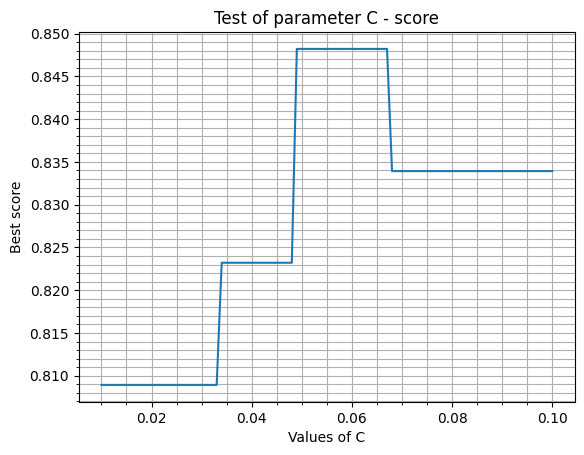

In [19]:
plt.title("Test of parameter C - score") 
plt.xlabel("Values of C") 
plt.ylabel("Best score") 
plt.plot(vec,best_scores)
plt.grid( which='major')  #, color='b', linestyle='-')
plt.grid( which='minor')  #,color='r', linestyle='--')
plt.minorticks_on()

plt.show()

In [20]:
####Max_Score_c= np.empty([len(vec),1], dtype=float)
Max_Score_c = np.amax(best_scores)
print(Max_Score_c.size)
print(Max_Score_c)
Max_Score_c_indexes = np.where(best_scores == np.amax(best_scores))  # tuple
print(Max_Score_c_indexes)

1
0.8482142857142856
(array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [21]:
#  we take the first element giving maximum bestscore. 
C_max=vec[ Max_Score_c_indexes[0][0] ]
print('C_max=',C_max)

C_max= 0.04899999999999997


<span style="color:#4169E1"> <b> Many values of C improve accuracy and achived maximum of best score.  Close to ~0.85. Note: this is for test_train_split random_state=3 !</b> </br> 
We will train our model with the first value of C:  C= C_max.  </span>

In [22]:
logreg_cv=GridSearchCV(estimator=lr, param_grid={"C":[C_max],'penalty':['l2'], 'solver':['lbfgs']}, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.04899999999999997], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [23]:
print("accuracy :",logreg_cv.best_score_)

accuracy : 0.8482142857142856


#### TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:
We add jaccard_score and f1_score. Also logloss

In [24]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
acc_LR=logreg_cv.score(X_test, Y_test);
print('Accuracy:', acc_LR)

Accuracy: 0.8888888888888888


In [26]:
yhat_LR= logreg_cv.predict(X_test)
print (classification_report(Y_test, yhat_LR))      

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.86      0.92        14

    accuracy                           0.89        18
   macro avg       0.83      0.93      0.86        18
weighted avg       0.93      0.89      0.90        18



In [27]:
jac_LR_0=jaccard_score(Y_test, yhat_LR, pos_label=0)
jac_LR_1=jaccard_score(Y_test, yhat_LR, pos_label=1)
f1_LR_0, f1_LR_1  =  f1_score(Y_test, yhat_LR, average=None)

LR_proba=logreg_cv.predict_proba(X_test)
log_loss_LR=log_loss(Y_test, LR_proba)

<span style="color:#4169E1"> <b> The model performs even better on the test set, with an accuracy of ~0.89. </b> <br> We can see a strong F-1 score in both cases, class 0= 'Did not land', class 1='Landed'. <br>
Again, note that all results are for random_state=3 </span> 

Lets look at the confusion matrix:

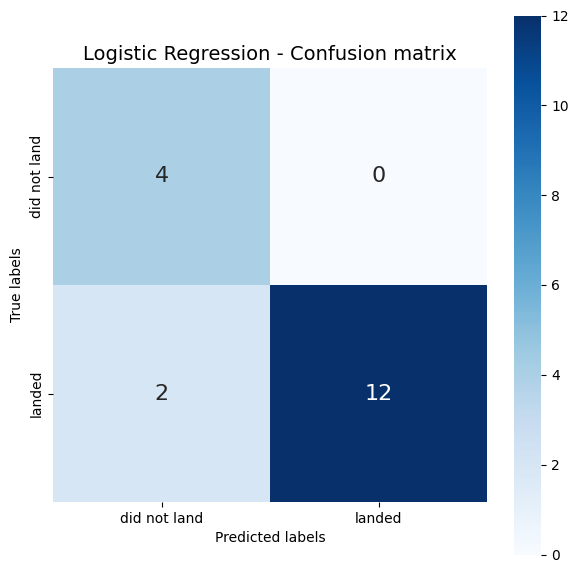

In [28]:
yhat_LR=logreg_cv.predict(X_test)
fig=plt.figure(figsize=(7,7))
plot_confusion_matrix(Y_test,yhat_LR)
plt.title("Logistic Regression - Confusion matrix", fontsize=14)
plt.savefig("figure1.png")

<span style="color:#4169E1"> <b> Great success with class=0 prediction, and good prediction with class=1. 2 false positive. </b> </span>

# <span style="color:#0094cf;"> 2. Support Vector Machine </span>

### TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [29]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [30]:
svm_cv = GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [31]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


<span style="color:#4169E1"> On the train set, the accuracy is pretty similar to the previous improved ML technique. <br>  <b> With Kernel= sigmoid, can we refine parameters C and gamma around their current optimal values ? </b>  With a linear scale this time.    </span>

In [32]:
vec_c =np.arange(0.1, 1.5, 0.1, dtype=float) 
vec_gamma =np.arange(0.01, 0.1, 0.01, dtype=float)   # GOOD
print(len(vec_c),len(vec_gamma))   

14 9


In [33]:
best_scores_cg= np.empty([len(vec_c),len(vec_gamma)], dtype=float)
#cg= np.empty([len(vec_c),len(vec_gamma)], dtype=float)                     

i=0
for c in vec_c:  
    j=0
    for  g in  vec_gamma:
        svm_cv_test=GridSearchCV(estimator=svm, param_grid=  {'kernel': ['sigmoid'], 'C': [c], 'gamma': [g]}, cv=10) 
        svm_cv_test.fit(X_train, Y_train)
        best_scores_cg[i][j]=svm_cv_test.best_score_  
        j=j+1                                                       
                                                                
    i=i+1


<span style="color:#4169E1"> <b> We find the maximum best score in best_scores_cg and indexes. Refined optimization improved accuracy ! /b> </span> 

In [34]:
Max_Score_cg = np.amax(best_scores_cg)
print(Max_Score_cg)

0.8642857142857142


<span style="color:#4169E1"> <b> We select the optimal couple (C, gamma)</b> </span> 

In [35]:
Max_Score_cg_indexes = np.where(best_scores_cg == np.amax(best_scores_cg))
print(Max_Score_cg_indexes)

(array([10]), array([8]))


In [36]:
Max_Score_cg_indexes[0]
#Max_Score_cg_indexes

array([10])

In [37]:
C_best=vec_c[Max_Score_cg_indexes[0]]
gamma_best=vec_gamma[Max_Score_cg_indexes[1]]
best_cg=np.amax(best_scores_cg)

In [38]:
print("Best score",best_cg,"Best C:", C_best, "Best gamma:",gamma_best)

Best score 0.8642857142857142 Best C: [1.1] Best gamma: [0.09]


<span style="color:#4169E1"> <b> We plot best_scores_cg v. (C, gamma)</b> </span> 
  

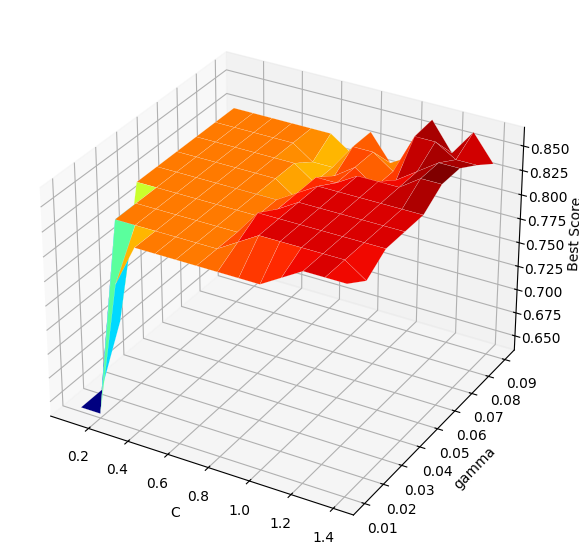

In [39]:
#fig = plt.figure()
fig=plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

XX,YY = np.meshgrid(vec_c,vec_gamma)
#ax.plot_surface(XX, YY, best_scores_cg.transpose(), rstride=1, cstride=1, cmap='viridis', edgecolor='none')
#ax.plot_surface(XX, YY, best_scores_cg.transpose(), rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.plot_surface(XX, YY, best_scores_cg.transpose(), rstride=1, cstride=1, cmap='jet', edgecolor='white', linewidth=0.1)
#cmap=cm.coolwarm
#ax.contour3D(XX,YY, best_scores_cg.transpose(), 50, cmap='binary')
#ax.contour3D(vec_gamma, vec_c, best_scores_cg, 50, cmap='binary')
ax.set_xlabel('C')
ax.set_ylabel('gamma')
ax.set_zlabel('Best Score');

<span style="color:#4169E1"> <b> We fit the model with the optimum couple (C,gamma) </b> </span>

In [40]:
svm_cv=GridSearchCV(estimator=svm, param_grid=  {'kernel': ['sigmoid'], 'C': C_best, 'gamma': gamma_best}, cv=10) 
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.1]), 'gamma': array([0.09]),
                         'kernel': ['sigmoid']})

In [41]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.1, 'gamma': 0.09, 'kernel': 'sigmoid'}
accuracy : 0.8642857142857142


#### TASK  7

Calculate the accuracy on the test data using the method <code>score</code>:

In [42]:
acc_svm=svm_cv.score(X_test, Y_test);
print('Accuracy:', acc_svm)

Accuracy: 0.8333333333333334


<span style="color:#4169E1"> <b> The model with optimum couple (C,gamma) does not perform that well with the test set </b> </span>

In [43]:
yhat_svm= svm_cv.predict(X_test)
print (classification_report(Y_test, yhat_svm)) 

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.79      0.88        14

    accuracy                           0.83        18
   macro avg       0.79      0.89      0.80        18
weighted avg       0.90      0.83      0.85        18



In [44]:
jac_svm_0=jaccard_score(Y_test, yhat_svm, pos_label=0)
jac_svm_1=jaccard_score(Y_test, yhat_svm, pos_label=1)
f1_svm_0, f1_svm_1  =  f1_score(Y_test, yhat_svm, average=None)

We can plot the confusion matrix

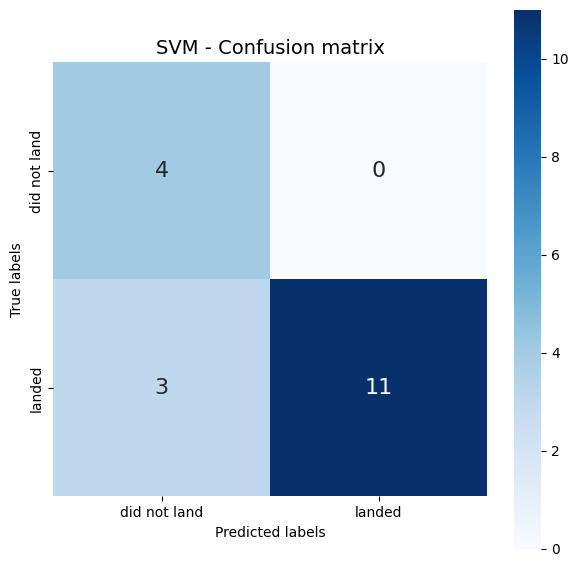

In [45]:
fig=plt.figure(figsize=(7,7))
plot_confusion_matrix(Y_test,yhat_svm)
plt.title("SVM - Confusion matrix", fontsize=14)
plt.savefig("figure2.png")

<span style="color:#4169E1"> <b> Slight degradation on "landed" label prediction compared with LR. </b> <br>  This degradation is reflected by the Classification report </span>

# <span style="color:#0094cf;"> 3. Decision Tree </span>

#### TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [46]:
# import graphviz
# import pydotplus
# import collections

In [47]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [48]:
tree_cv = GridSearchCV(tree,parameters,cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [49]:
print("tuned hyperparameters: (best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters: (best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8875000000000002


#### TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [50]:
acc_tree=tree_cv.score(X_test, Y_test);
print('Accuracy:', acc_tree)

Accuracy: 0.8888888888888888


In [51]:
yhat_tree = tree_cv.predict(X_test)
print (classification_report(Y_test, yhat_tree))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.86      0.92        14

    accuracy                           0.89        18
   macro avg       0.83      0.93      0.86        18
weighted avg       0.93      0.89      0.90        18



In [52]:
jac_tree_0=jaccard_score(Y_test, yhat_tree, pos_label=0)
jac_tree_1=jaccard_score(Y_test, yhat_tree, pos_label=1)
f1_tree_0, f1_tree_1  =  f1_score(Y_test, yhat_tree, average=None)

We can plot the confusion matrix


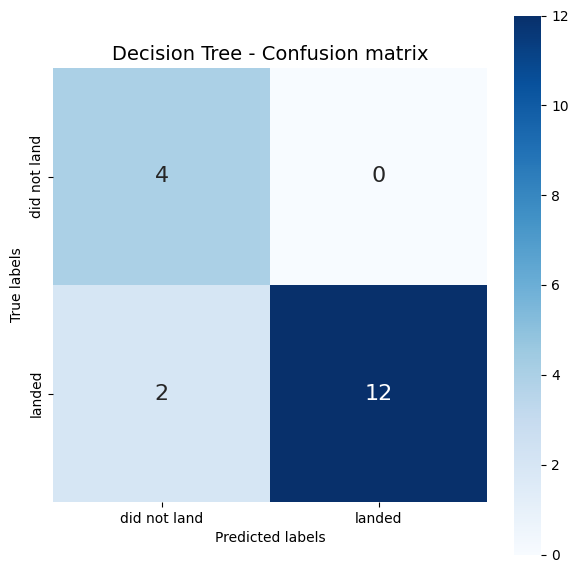

In [53]:
fig=plt.figure(figsize=(7,7))
plot_confusion_matrix(Y_test,yhat_tree)
plt.title("Decision Tree - Confusion matrix", fontsize=14)
plt.savefig("figure3.png")

# <span style="color:#0094cf;"> 4. K Nearest Neighbor(KNN)</span>

#### TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [54]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [55]:


knn_cv = GridSearchCV(KNN,parameters,cv=10)
knn_cv.fit(X_train, Y_train)




GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [56]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
accuracy : 0.8357142857142856


#### TASK  11


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [57]:
acc_knn=knn_cv.score(X_test, Y_test);
print('Accuracy:', acc_knn)

Accuracy: 0.9444444444444444


<span style="color:#4169E1"> <b>  KNN:  Best accuracy with test set. No refined optimization was performed in this case.  </b></span>

In [58]:
yhat_knn = knn_cv.predict(X_test)
print (classification_report(Y_test, yhat_knn))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.93      0.96        14

    accuracy                           0.94        18
   macro avg       0.90      0.96      0.93        18
weighted avg       0.96      0.94      0.95        18



In [59]:
jac_knn_0=jaccard_score(Y_test, yhat_knn, pos_label=0)
jac_knn_1=jaccard_score(Y_test, yhat_knn, pos_label=1)
f1_knn_0, f1_knn_1  =  f1_score(Y_test, yhat_knn, average=None)

We can plot the confusion matrix


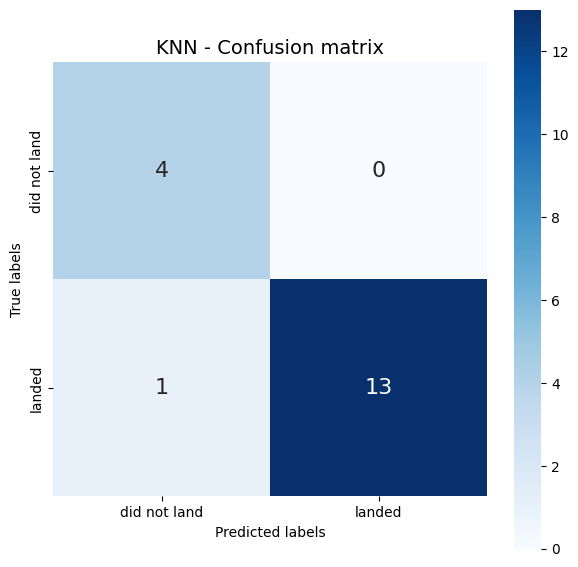

In [60]:
fig=plt.figure(figsize=(7,7))
plot_confusion_matrix(Y_test,yhat_knn)
plt.title("KNN - Confusion matrix", fontsize=14)
plt.savefig("figure4.png")

# <span style="color:#0094cf;">  5. Synthesis \& Conclusions </span>

#### TASK  12


Find the method that performs best:


In [61]:
# np.round does not like 'strings'  --- we replace NA with -1.    
numpy_data_0 = np.round(np.array( [[jac_LR_0, f1_LR_0, log_loss_LR] , [jac_svm_0, f1_svm_0 , -1] ,[jac_tree_0, f1_tree_0, -1 ], [jac_knn_0, f1_knn_0, -1] ] ),3)
numpy_data_1 = np.round(np.array( [[jac_LR_1, f1_LR_1, log_loss_LR] , [jac_svm_1, f1_svm_1 , -1] ,[jac_tree_1, f1_tree_1, -1 ], [jac_knn_1, f1_knn_1, -1] ] ),3)
#------------
df_0 = pd.DataFrame(data=numpy_data_0, index=["Logistic Regression", 'SVM', "Decision Tree","KNN"], columns=["Jaccard", "f1-score", 'logloss'])
df_1 = pd.DataFrame(data=numpy_data_1, index=["Logistic Regression", 'SVM', "Decision Tree","KNN"], columns=["Jaccard", "f1-score", 'logloss'])

In [62]:
df_0.columns.name = 'Algorithm'
df_1.columns.name = 'Algorithm'

df_0=df_0.replace({-1:'NA'})
df_1=df_1.replace({-1:'NA'})

In [63]:
#import numpy as np
#import pandas as pd   
from IPython.display import display_html 

#df1 = pd.DataFrame(np.arange(12).reshape((3,4)),columns=['A','B','C','D',])
#df2 = pd.DataFrame(np.arange(16).reshape((4,4)),columns=['A','B','C','D',])


styles = [dict(selector="caption",
            props=[("text-align", "left"),
                   ("font-size", "150%"),
                   ("color", 'black')])]


df_0_styler = df_0.style.set_table_attributes("style='display:inline'").set_caption('<b>Did not land</b>').set_table_styles(styles)
df_1_styler = df_1.style.set_table_attributes("style='display:inline'").set_caption('<b>Landed</b>').set_table_styles(styles)


(-0.5, 699.5, 699.5, -0.5)

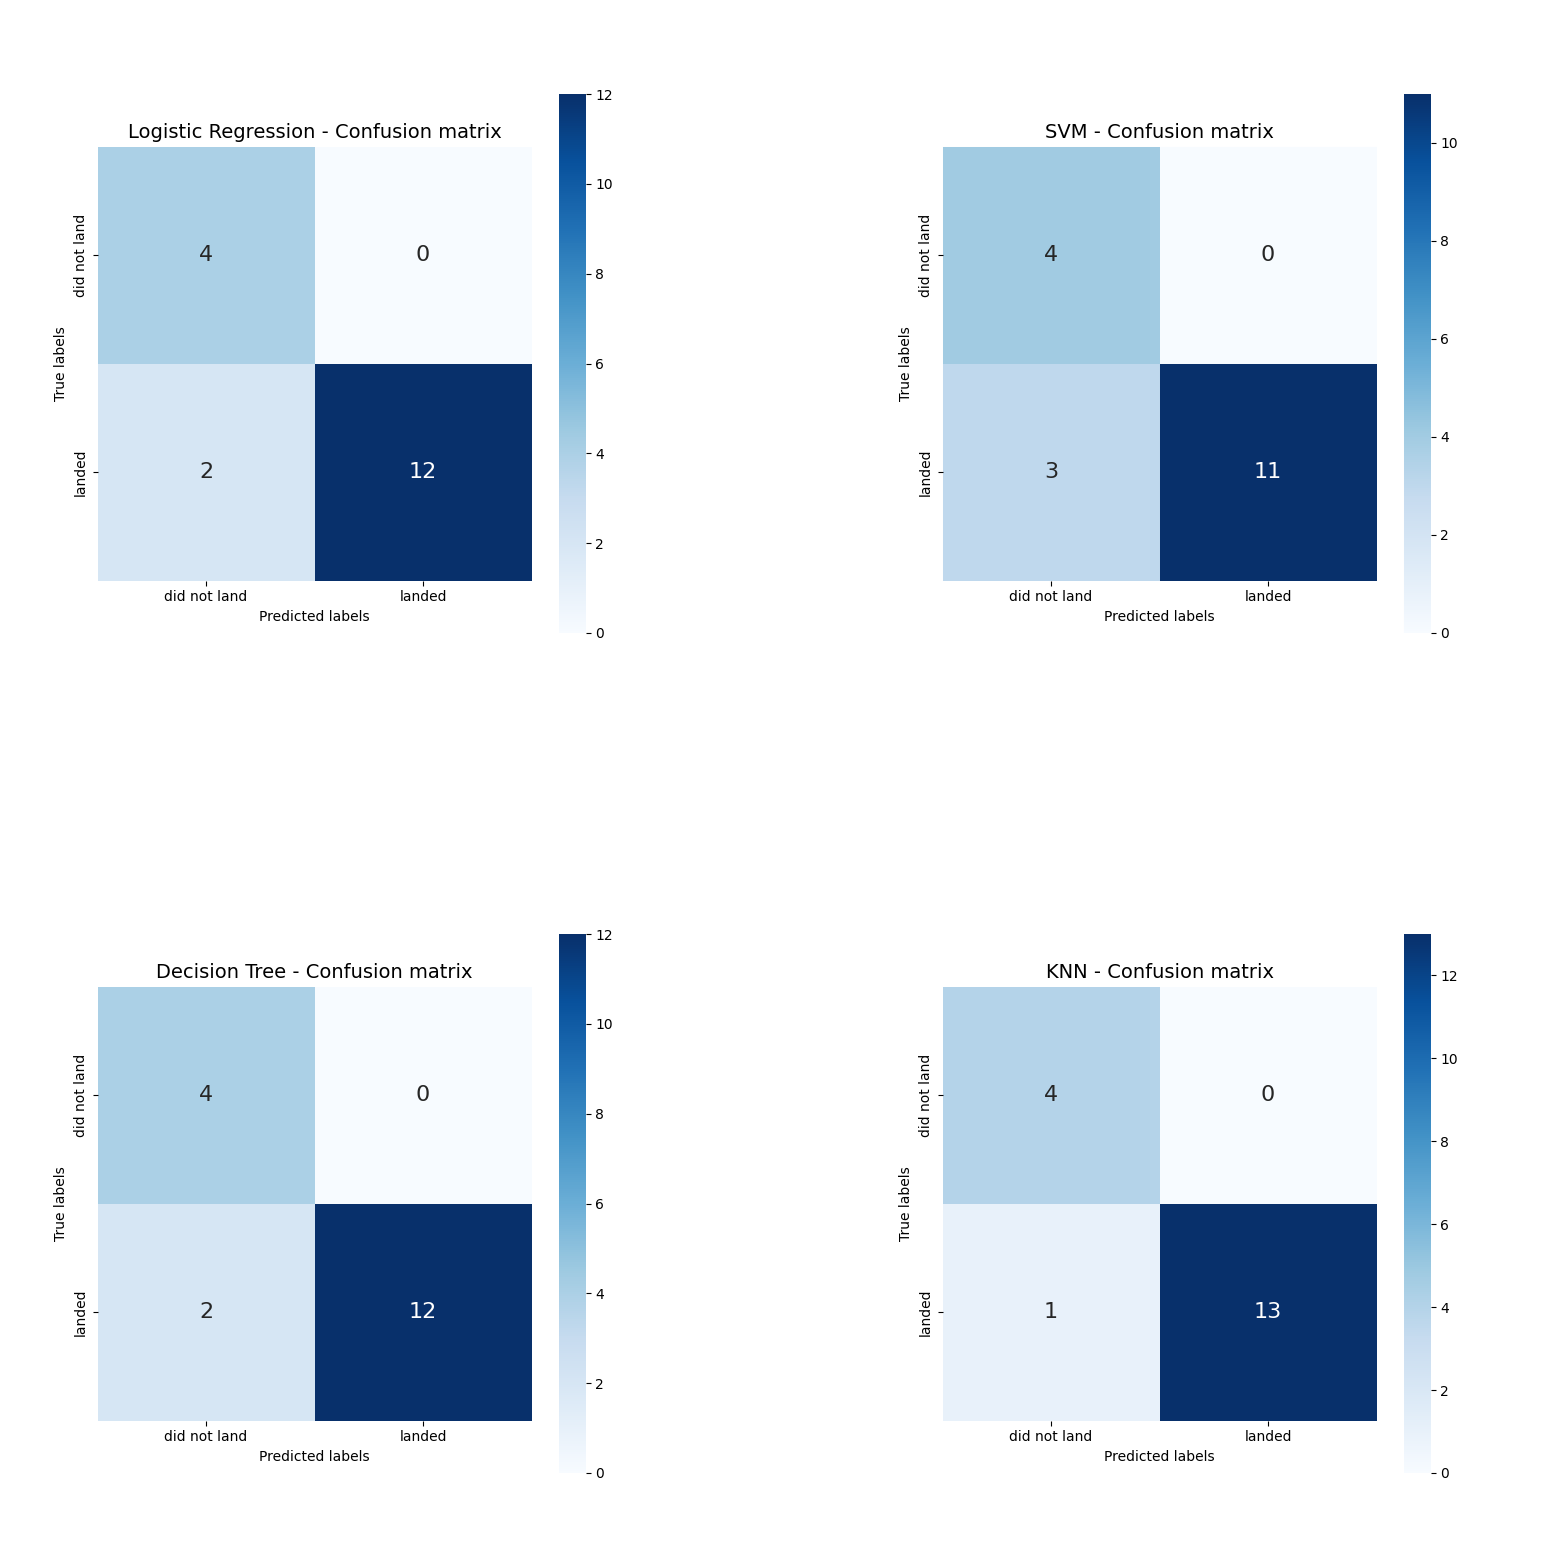

In [64]:
import matplotlib.image as mpimg  
# create figure
fig = plt.figure(figsize=(20, 20))
# setting values to rows and column variables
rows = 2
columns = 2 
# reading images
Image1 = mpimg.imread('figure1.png')
Image2 = mpimg.imread('figure2.png')
Image3 = mpimg.imread('figure3.png')
Image4 = mpimg.imread('figure4.png')

fig.add_subplot(rows, columns, 1)  
plt.imshow(Image1)
plt.axis('off')

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
  
fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.axis('off')

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.axis('off')

In [65]:
display_html(df_0_styler._repr_html_()+df_1_styler._repr_html_(), raw=True)

Algorithm,Jaccard,f1-score,logloss
Logistic Regression,0.667000,0.800000,0.288000
SVM,0.571000,0.727000,NA
Decision Tree,0.667000,0.800000,NA
KNN,0.800000,0.889000,NA
Algorithm,Jaccard,f1-score,logloss
Logistic Regression,0.857000,0.923000,0.288000
SVM,0.786000,0.880000,NA
Decision Tree,0.857000,0.923000,NA
KNN,0.929000,0.963000,NA


#####   <span style="color:#4169E1"> Accuracy histogram for the presentation</span>

In [66]:
accuracy_dict = {   'Model': ['Logistic Regression', 'SVM','Decision Tree','KNN'], 'Accuracy': [acc_LR, acc_svm, acc_tree, acc_knn]   }
df_accuracy = pd.DataFrame(accuracy_dict )
blankIndex=[''] * len(df_accuracy)
df_accuracy.index=blankIndex
df_accuracy

,Model,Accuracy
,Logistic Regression,0.888889
,SVM,0.833333
,Decision Tree,0.888889
,KNN,0.944444


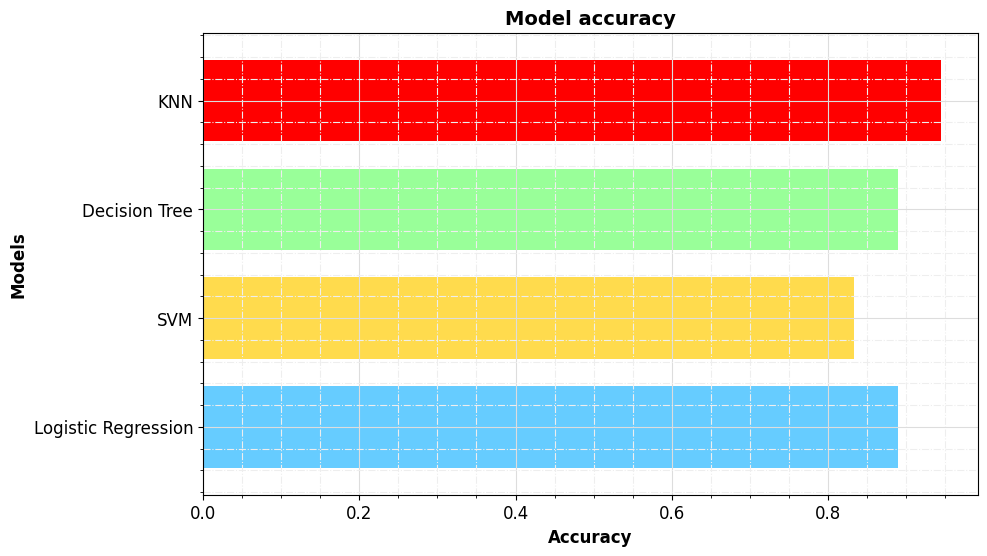

In [67]:
from matplotlib import pyplot as plt
# bars_colors=['#ABFAF7','#E8DE7B','#ABFAAE','r']  # tesing colors 
# bars_colors=['b','#E8DE7B','#ABFAAE','r']  # tesing colors 
bars_colors=['#66ccff','#ffdb4d','#99ff99','r'] # tesing colors 
#-----------------------------------------------
df_accuracy.plot(x="Model", y="Accuracy", kind="barh", width=0.75, figsize=(10, 6), fontsize=12, color =bars_colors,  legend=None )
plt.grid( which='major', color='#DDDDDD', linestyle='-') # testing things 
plt.grid( which='minor', color='#EEEEEE', linestyle='-.') # testing more things
plt.minorticks_on()
plt.title('Model accuracy', fontsize=14, fontweight='bold')
plt.ylabel('Models', fontsize=12, fontweight='bold')
plt.xlabel('Accuracy', fontsize=12, fontweight='bold')
plt.savefig('Accuracy_models')

###   <span style="color:#4169E1"> <b>  In our case, KNN is the best method.  </b></span>

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-08-31        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |


Copyright © 2020 IBM Corporation. All rights reserved.
